<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**1. Membuat Gamma Correction**

Gamma Correction pada citra
----------------------------------
Masukkan nilai kecerahan: 3


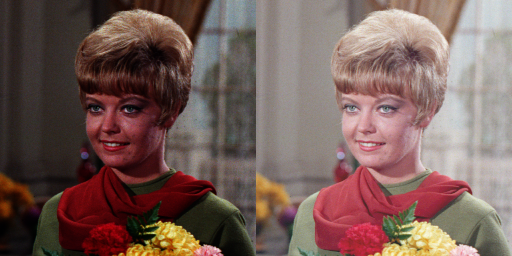

In [3]:
print('Gamma Correction pada citra')
print('----------------------------------')

# Get brightness input and calculate invGamma
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
    invGamma = 1.0 / brightness  # Calculate invGamma
except ValueError:
    print('Error, not a number')
    exit()

# Read the original image
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_corrected_image = np.zeros(original.shape, original.dtype)

# Apply gamma correction pixel by pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Apply gamma correction formula
            gamma_corrected_image[y, x, c] = np.clip(255 * (original[y, x, c] / 255) ** invGamma, 0, 255)

# Display the original and gamma-corrected images side by side
final_frame = cv.hconcat((original, gamma_corrected_image))
cv2_imshow(final_frame)


**2. Membuat Simulasi Image Depth**

Simulasi Image Depth pada citra
----------------------------------


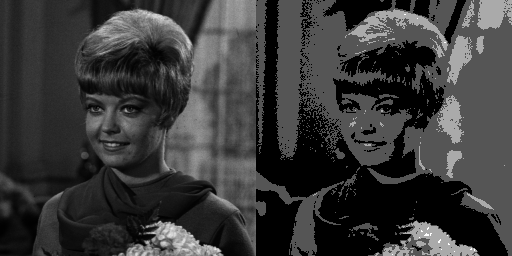

In [4]:
print('Simulasi Image Depth pada citra')
print('----------------------------------')

bit_depth = 2  # Set desired bit depth
level = 255 / (pow(2, bit_depth) - 1)

# Convert the original image to grayscale
original_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_gray.shape, original_gray.dtype)

# Apply the bit depth transformation
for y in range(original_gray.shape[0]):
    for x in range(original_gray.shape[1]):
        # Simulate image depth
        depth_value = np.round(original_gray[y, x] / level) * level
        depth_image[y, x] = np.clip(depth_value, 0, 255)

# Display the original and depth images side by side
final_frame = cv.hconcat((original_gray, depth_image.astype(np.uint8)))  # Ensure depth_image is uint8
cv2_imshow(final_frame)


**3. Membuat modul Average Denoising**

In [5]:
import cv2 as cv
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/images/galaxy.jpg.'):
    n = cv.imread(img)  # Indent this line
    cv_img.append(n)


In [6]:
import cv2 as cv
import glob

# Initialize an empty list to store images
cv_img = []

# Read the original image
original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)
cv_img.append(original_image)  # Append the original image to the list

# Read all noisy images from the specified folder
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)  # Append each noisy image to the list


a. Jumlah Citra di Average 5

Average 5
-----------------------------------
PSNR: 64.13 dB


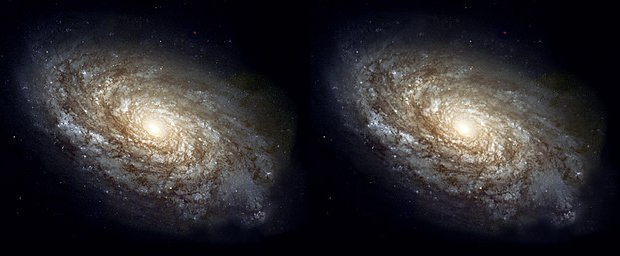

In [7]:
print('Average 5')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(5)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(5):
        average_image += cv_img[i] / 5
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)

b. Jumlah Citra di Average 10

Average 10
-----------------------------------
PSNR: 53.75 dB


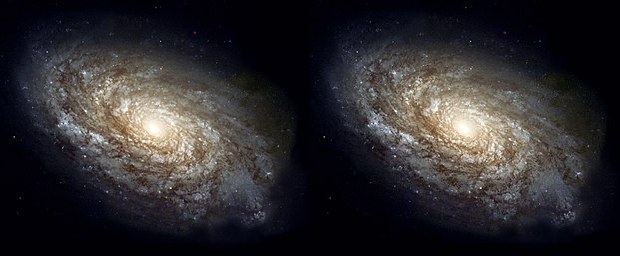

In [9]:
print('Average 10')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(10)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(10):
        average_image += cv_img[i] / 10
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)



c. Jumlah Citra di Average 20

Average 20
-----------------------------------
PSNR: 53.95 dB


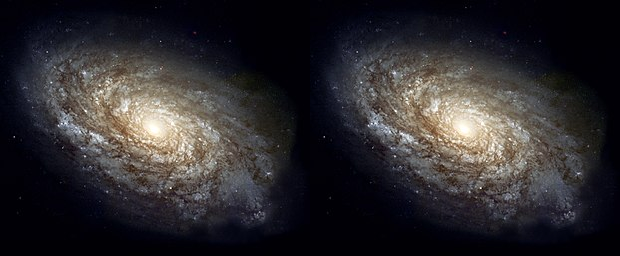

In [11]:
print('Average 20')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(20)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(20):
        average_image += cv_img[i] / 20
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')  # Infinite PSNR if there is no noise
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)


d. Jumlah Citra Average 40

Average 40
-----------------------------------
PSNR: 51.76 dB


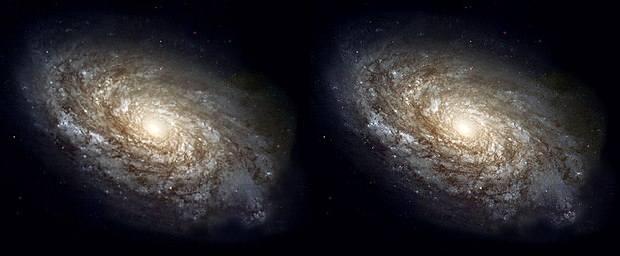

In [12]:
print('Average 40')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(40)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(40):
        average_image += cv_img[i] / 40
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')  # Infinite PSNR if there is no noise
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)


e. Jumlah Citra Average 80

Average 80
-----------------------------------
PSNR: 51.53 dB


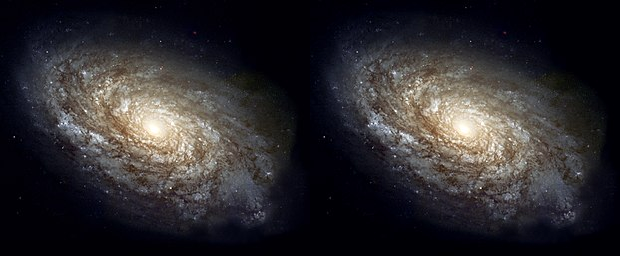

In [13]:
print('Average 80')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(80)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(80):
        average_image += cv_img[i] / 80
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)


f. Jumlah Citra Average 100

Average 100
-----------------------------------
PSNR: 51.10 dB


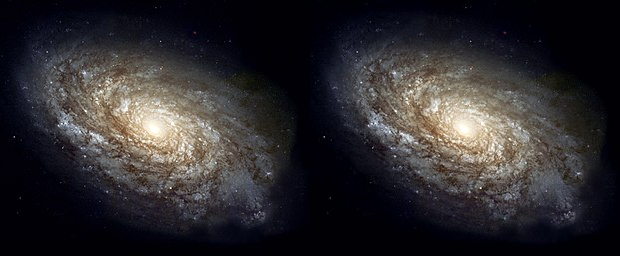

In [14]:
print('Average 100')
print('-----------------------------------')

original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    cv_img = [original_image.copy() for _ in range(100)]
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(100):
        average_image += cv_img[i] / 100
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')  # Infinite PSNR if there is no noise
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)


**Kesimpulan**

Dapat disimpulkan bahwa ada titik optimal untuk jumlah citra yang di-average, di mana peningkatan jumlah citra yang di-average awalnya menurunkan PSNR secara signifikan, tetapi setelah mencapai 20 citra, penurunan PSNR menjadi kecil dan cenderung stabil. Penambahan citra di atas 20 tidak memberikan peningkatan signifikan, malah sedikit mengurangi detail citra. Titik optimal averaging tampak ada di sekitar 10-20 citra.

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kelompok 4
-----------------------------------


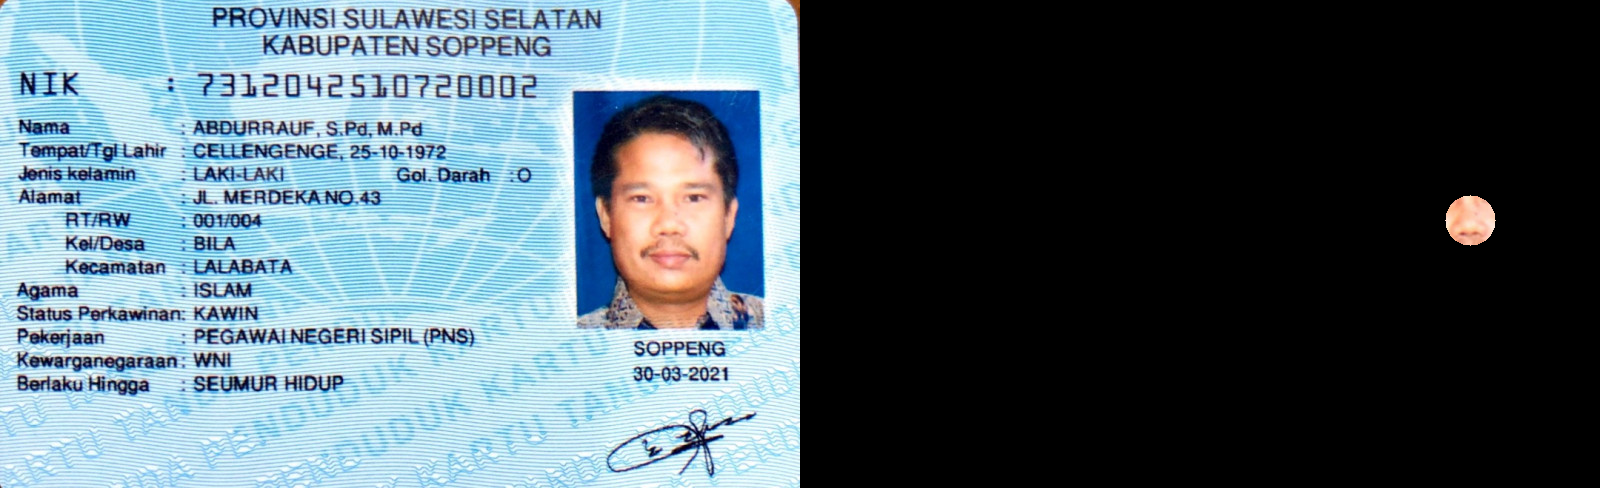

In [15]:
print('Kelompok 4')
print('-----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')

# Check if the image was loaded successfully
if original is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Specify the circle parameters (center at the nose region)
    center_x = 670  # Adjust these values based on the nose location
    center_y = 220
    radius = 25

    # Create a black mask and draw a white circle on it
    mask = np.zeros(original.shape[:2], dtype=np.uint8)
    cv.circle(mask, (center_x, center_y), radius, (255), thickness=-1)

    # Use the mask to extract the region inside the circle
    nose_region = cv.bitwise_and(original, original, mask=mask)

    # Create a white background to place the extracted nose region
    isolated_nose = np.ones_like(original) * 255
    isolated_nose = cv.bitwise_and(isolated_nose, isolated_nose, mask=mask)
    isolated_nose += nose_region

    # Draw the circle on the original image for comparison
    circled_image = original.copy()
    cv.circle(circled_image, (center_x, center_y), radius, (0, 0, 0), thickness=2)

    # Concatenate the original image with the isolated nose region (both will be in color)
    final_frame = cv.hconcat([original, isolated_nose])

    # Display the result using cv2_imshow for Google Colab
    cv2_imshow(final_frame)


**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.**

NOT (komplemen)

OR (Atau)

AND (Dan)

NAND (Not And)